That DP Quora answer     
https://www.quora.com/Are-there-any-good-resources-or-tutorials-for-dynamic-programming-DP-besides-the-TopCoder-tutorial/answer/Michal-Danil%C3%A1k?ch=15&oid=1329095&share=c42c0702&srid=hzuEBg&target_type=answer

# 1 Write a backtracking solution

In [ ]:
int p[N]; // read-only array of wine prices 
 
// year represents the current year (starts with 1) 
// [be, en] represents the interval of the unsold wines on the shelf 
int profit(int year, int be, int en) { 
  // there are no more wines on the shelf 
  if (be > en) 
    return 0; 
 
  // try to sell the leftmost or the rightmost wine, recursively calculate the  
  // answer and return the better one 
  return max( 
    profit(year+1, be+1, en) + year * p[be], 
    profit(year+1, be, en-1) + year * p[en]); 
} 

In [ ]:
int answer = profit(1, 0, N-1); // N is the total number of wines 

This solution simply tries all the possible valid orders of selling the wines. If there are N wines in the beginning, it will try 2^N possibilities (each year we have 2 choices). So even though now we get the correct answer, the time complexity of the algorithm grows exponentially.

# 2 Minimize the state space of function arguments
In this step I want you to think about, which of the arguments you pass to the function are redundant. Either we can construct them from the other arguments or we don't need them at all. If there are any such arguments, don't pass them to the function. Just calculate them inside the function.

In the above function profit, the argument year is redundant. It is equivalent to the number of wines we have already sold plus one, which is equivalent to the total number of wines from the beginning minus the number of wines we have not sold plus one. If we create a read-only global variable N, representing the total number of wines in the beginning, we can rewrite our function as follows:

I also want you to think about the range of possible values the function arguments can get from a valid input. In our case, each of the arguments be and en can contain values from 0 to N-1. In valid inputs we also expect be <= en+1. Using big-O notation we can say, there are O(N^2) different arguments our function can be called with.

# Now cache it!

We are now 99% done. To transform the backtrack function with time complexity O(2^N) into the memoization solution with time complexity O(N^2) we will use a little trick which doesn't require almost any thinking.

As noted above, there are only O(N^2) different arguments our function can be called with. In other words, there are only O(N^2) different things we can actually compute. So where does O(2^N) time complexity comes from and what does it compute?!

The answer is - the exponential time complexity comes from the repeated recursion and because of that, it computes the same values again and again. If you run the above code for an arbitrary array of N=20 wines and calculate how many times was the function called for arguments be=10 and en=10 you will get a number 92378. That's a huge waste of time to compute the same answer that many times. What we can do to improve this is to cache the values once we have computed them and every time the function asks for an already cached value, we don't need to run the whole recursion again. See the code below:

In [ ]:
int N; // read-only number of wines in the beginning 
int p[N]; // read-only array of wine prices 
int cache[N][N]; // all values initialized to -1 (or anything you choose) 
 
int profit(int be, int en) { 
  if (be > en) 
    return 0; 
 
  // these two lines save the day 
  if (cache[be][en] != -1) 
    return cache[be][en]; 
 
  int year = N - (en-be+1) + 1; 
  // when calculating the new answer, don't forget to cache it 
  return cache[be][en] = max( 
    profit(be+1, en) + year * p[be], 
    profit(be, en-1) + year * p[en]); 
}

And that's it! With that little trick it runs O(N^2) time, because there are O(N^2) different arguments our function can be called with and for each of them, the function runs only once with O(1) time complexit

# Cakewalk 0

Minimize no. of coins to make a sum  
(https://leetcode.com/problems/coin-change/description/)

1. V store available denominations
2. coin can not be 0 or negative
3. v elements are unique
4. You can take any coin any number of time

In [ ]:
//let us suppose there is a function f, which gives us min. no of coins
//to make the sum 
//f(k=sum,v)-> min. no of coins required to make sum k
int minNoOfCoinsToMakeSumK(int k){
	if(k==0) return 0;
	if(k<0) return inf;
	int minn=inf;
	for(int i=0;i<(int)v.size();i++){
			minn=min(minn,minNoOfCoinsToMakeSumK(k-v[i]));	
		}
	if(minn==inf) return inf;
	return 1+minn;
}

Time complexity?

In [ ]:
//inf;
Integer.MAX_VALUE
//
Long.MAX_VALUE
//v.size()
v.length;


In [ ]:
//memoize it
vector<int> mem(k+1,-1);
int minNoOfCoinsToMakeSumK(int k){
	if(k==0) return 0;
	if(k<0) return inf;
	if(mem[k]!=-1) return mem[k];
	int minn=inf;
	for(int i=0;i<n;i++){
			minn=minNoOfCoinsToMakeSumK(minn,f(k-v[i]));	
		}
	if(minn==inf) return inf;
	return mem[k]=1+minn;
}

int driver(){
	vector<int> mem(k+1,-1)
}

In [ ]:
// vector<int> mem(k+1,-1);
//convert this code to array
int mem[k+1];
//using fill_n functtion or loop, thatswhy using vector is so much better

Time complexity?

In [ ]:
//vector<int> mem(k+1,-1)
int[] mem = new int[k+1];
Arrays.fill(mem, -1);

//use ArrayList instead for java
ArrayList<Integer> mem = new ArrayList<>(Collections.nCopies(k + 1, -1));

In [ ]:
//Tabular form
//dp[k]->
//dp[k]=1+min(dp[k-v[0]],dp[k-v[1]],dp[k-v[2]]......dp[k-v[n-1]]) 
//dp[0]=0 
vector<int> dp(k+1);
//dp[i] -> min no. of coins required to make sum i
// int minNoOfCoinsToMakeSumK(int k){
// 	if(k==0) return 0;
// 	if(k<0) return inf;
// 	minn=inf;
// 	for(int i=0;i<(int)v.size();i++){
// 			minn=min(minn,minNoOfCoinsToMakeSumK(k-v[i]));	
// 		}
// 	if(minn==inf) return inf;
// 	return 1+minn;
// }
dp[0]=0;
for(int i=1;i<=k;i++){
	int minn= inf;
	for(int x: v){
		if(i-x>=0) minn=min(minn, dp[i-x]);
	}
	dp[i]=minn;
	if(dp[i]!=inf) dp[i]++;
}
return dp[k]

nk

# Q1
No. of ways you can make sum=k from v, such that 1 2 is different from 2 1 (dice)   
(https://cses.fi/problemset/task/1635)

1. V store available values
2. Careully see V can have which types of numbers
3. v elements are unique
4. You can take any element any number of time

In [ ]:
vl mem(1e6+1,-1);
//globally 1e7 tak

ll f(ll k, vl v){
    if(k==0) return 1;
    if(k<0) return 0;
    if(mem[k]!=-1) return mem[k];
    ll ans=0;   
    for(int x: v){
        ans=moda(ans,f(k-x,v));
    }
    return mem[k]=ans;
}


void solve(){
    iinp(k);
    vl v={1,2,3,4,5,6};
    pri(f(k,v));
}


TC?

In [ ]:
//if 0 was allowed in the dice?
//I think that can lead to infinite answers

In [ ]:
//dp[k]->
//dp[k]=dp[k-v[0]]+dp[k-v[1]]+dp[k-v[2]]......dp[k-v[n-1]] 
//All of these states will be different
//dp[0]=1 
dp[0]=1;
for(int i=1;i<=k;i++){
	int sum=0;
	for(int x: v){
		if(i-x>=0){
			sum+=dp[i-x];
		}
	}
	dp[i]=sum;
}

# Cakewalk 1: The classics: Take or not take

## This is where Quora knowledge will come handy

# Q2
No. of ways you can make sum=k from v, such that 1 2 is same as 2 1  
https://www.geeksforgeeks.org/problems/perfect-sum-problem5633/1


1. V store available denominations
2. Element can be 0
3. v elements cant repeat
4. You can take any element only once

In [ ]:
int p[N]; // read-only array of wine prices 
 
// year represents the current year (starts with 1) 
// [be, en] represents the interval of the unsold wines on the shelf 
int profit(int year, int be, int en) { 
  // there are no more wines on the shelf 
  if (be > en) 
    return 0; 
 
  // try to sell the leftmost or the rightmost wine, recursively calculate the  
  // answer and return the better one 
  return max( 
    profit(year+1, be+1, en) + year * p[be], 
    profit(year+1, be, en-1) + year * p[en]); 
}

In [ ]:
// f(k, idx)-> No. of ways to make sum=k such that we are standing on idx=idx
int noOwWays(int k, int idx){
	if(k==0 and idx<0) return 1;
	if(k<0 or idx<0) return 0;
	return noOwWays(k-v[idx],idx-1)+noOwWays(k, idx-1);
}


In [ ]:
//dp[n][k]= no. of ways to make k such that we are standing on nth coin
//dp[i][j]=dp[i-1][j-v[i-1]]+dp[i-1][j]
//dp[0][any sum]=0
//dp[any elements remaining][0]= we dont know, depends upon no of zero present
//BUT
//dp[0][0]=1

int n=v.size();
vector<vector<int>> dp(n+1,vector<int>(k+1,0));
dp[0][0]=1;
for(int i=1;i<=n;i++){
     for(int j=0;j<=k;j++){
            dp[i][j]=dp[i-1][j];
            if(j-v[i-1]>=0) dp[i][j]=moda(dp[i][j],dp[i-1][j-v[i-1]]);
        }
}
return dp[n][k];

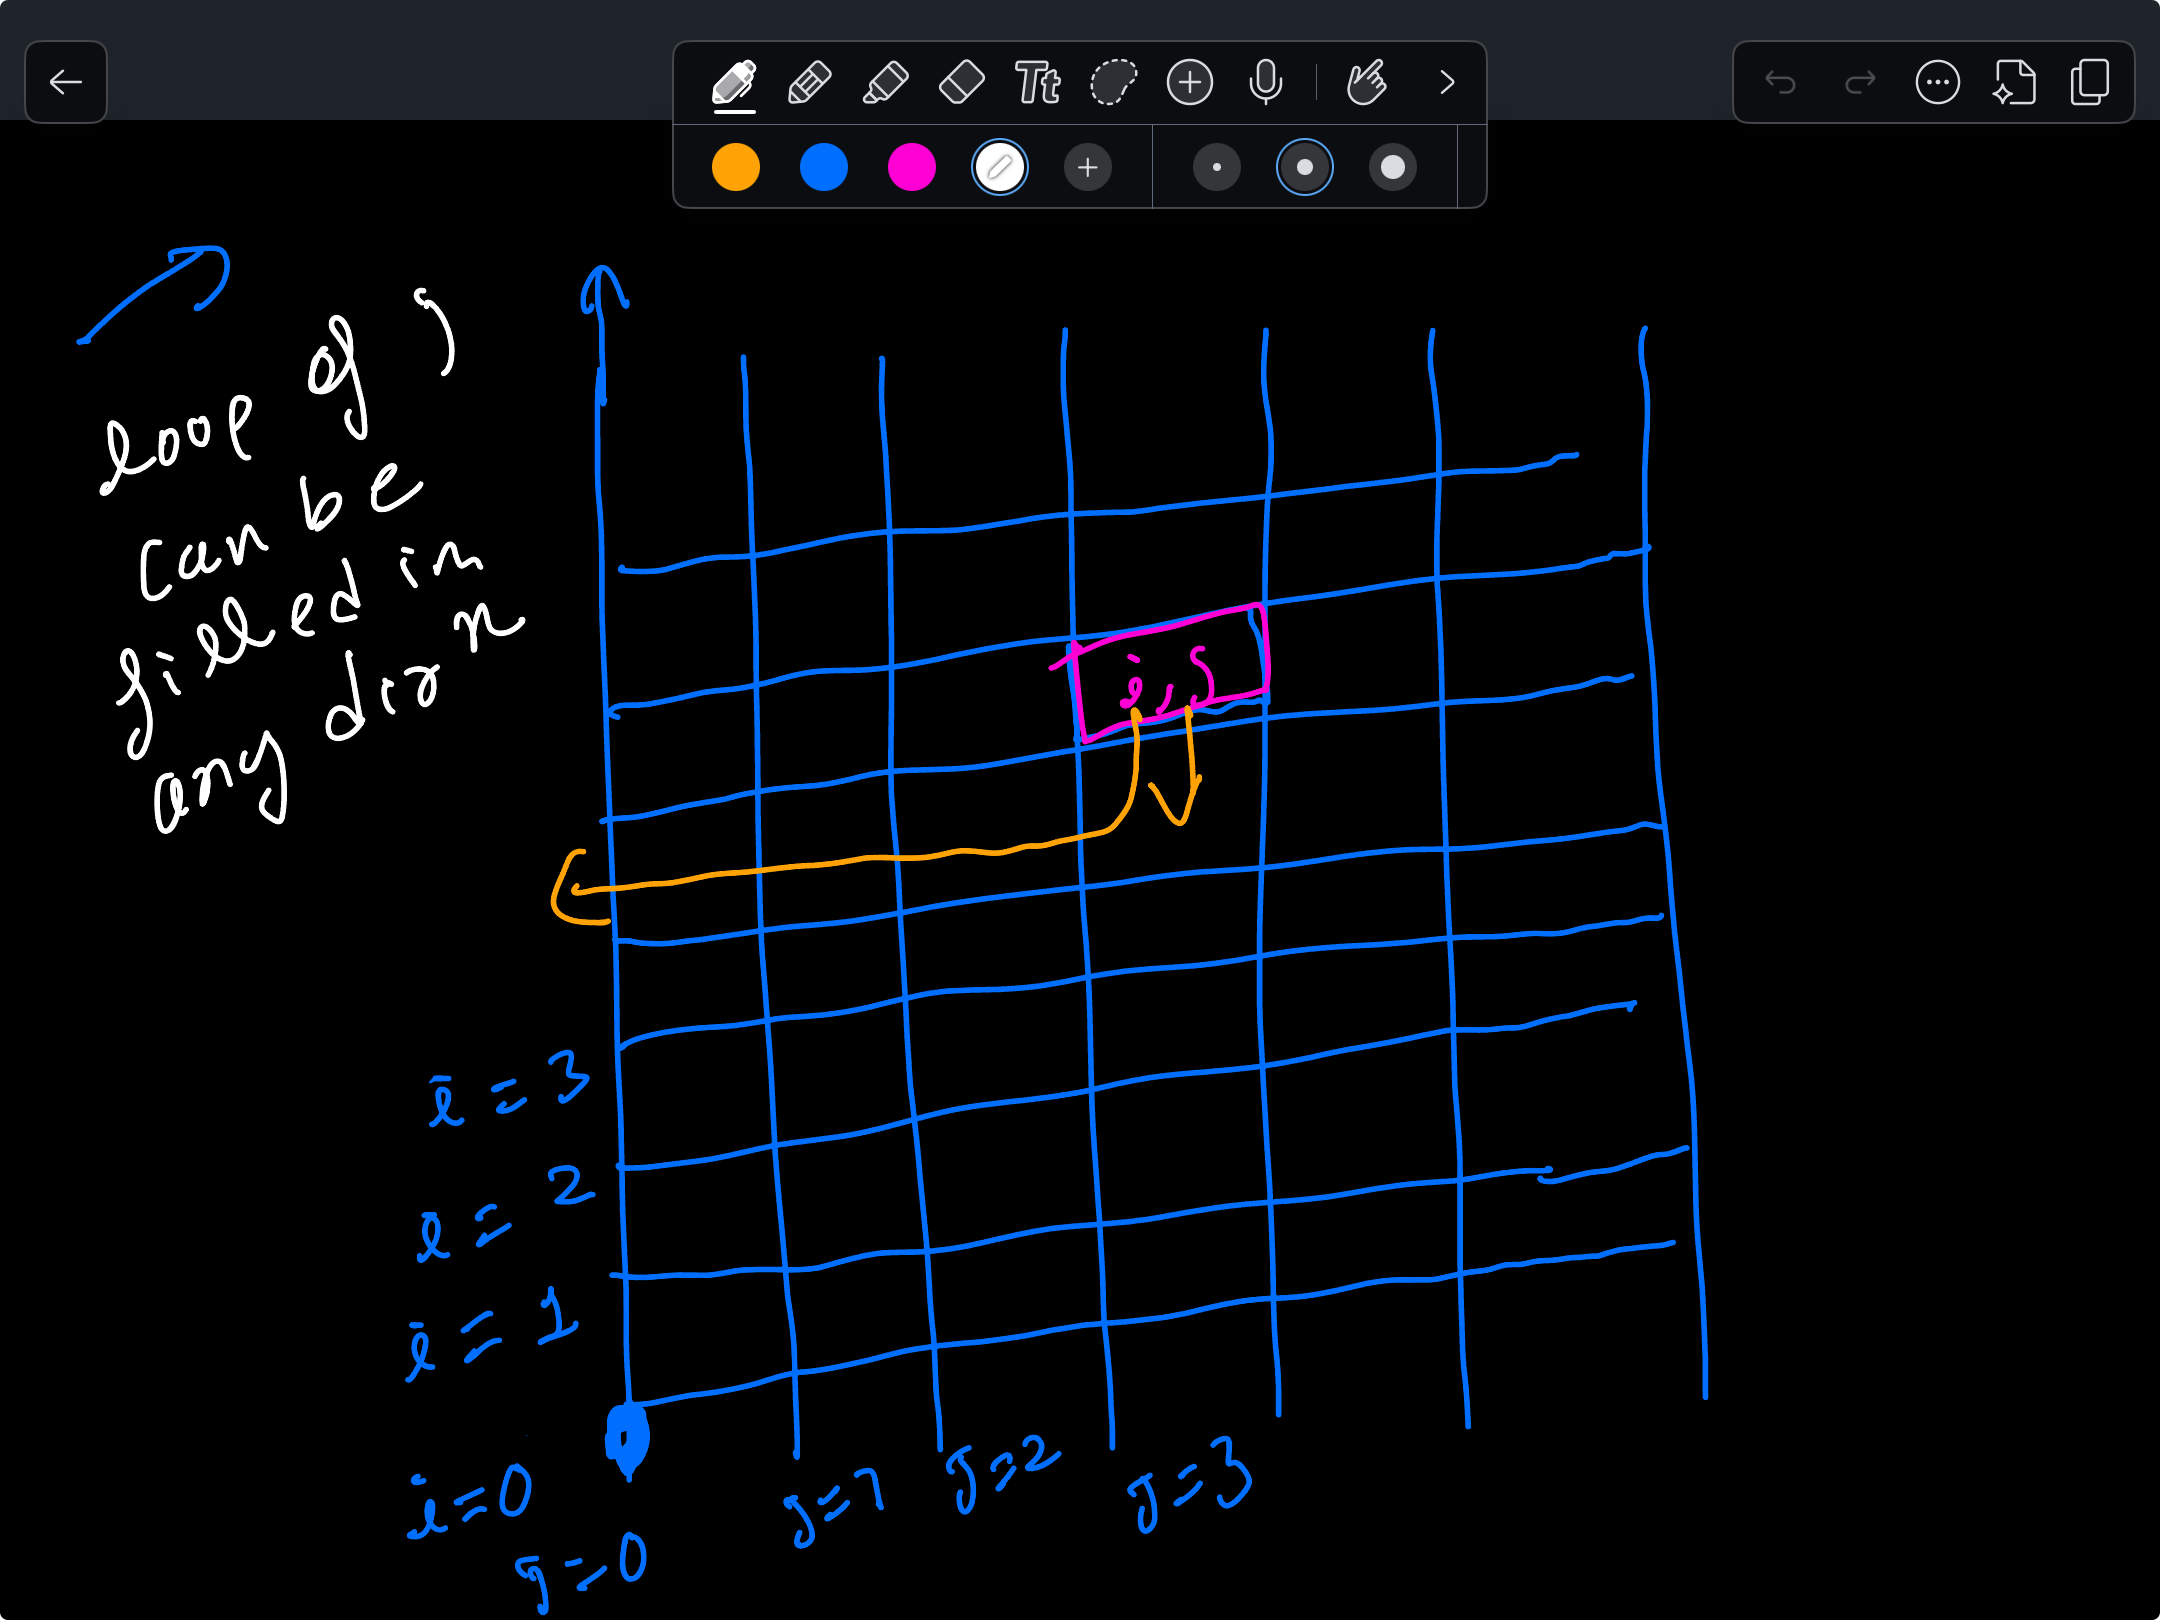

# Space optimized
dp[i][j]=dp[i-1][j-v[i-1]]+dp[i-1][j]   
two vectors will be sufficient of length k+1

In [ ]:
vector<int> prev(k+1),curr(k+1);
prev[0]=1;
for(int i=1;i<=n;i++){
    for(int j=0;j<=k;j++){
        curr[j]=prev[j];
        if(j-v[i-1]>=0) curr[j]=moda(curr[j],prev[j-v[i-1]]);
    }        
    prev=curr;
}
return curr[k]

Same as above except we can take an element any no of. of times (no of ways a sum k can be constructed from given coins array)   
(https://cses.fi/problemset/task/1636)

The array elements do not contain 0

Even when you are taking an element, dont change the index

In [ ]:
ll noOfWays(ll idx, ll k, vl &v){ 
    if(k==0) return 1;   
    if(idx<0 or k<0) return 0;      
    noOfWays(idx-1,k,v)+noOfWays(idx,k-v[idx],v); 
} 

In [ ]:
//dp[i][j]=
//dp[i-1][j] + dp[i][j-v[i-1]]
// we dont need prev array, we have reduced the problem into sc of single array
ans[0]=1; 
for(int i=1;i<=n;i++){ 
    for(int j=1;j<=k;j++){ 
        if(j-v[i-1]>=0) ans[j]=moda(ans[j],ans[j-v[i-1]]); 
    }       
} 
print(ans[k]); 



# Associated cakewalk

Q. True or False
https://www.geeksforgeeks.org/problems/subset-sum-problem-1611555638/1

1. An element can be taken only once
2. There will be no repetitionsœ


In [ ]:
// f(k, idx)
int isPossible(int k, int idx){
	if(k==0) return 1;
	if(k<0 or idx<0) return 0;
	//Take or not take
	return isPossible(k-v[idx],idx-1) or isPossible(k, idx-1);
}


In [ ]:
vector<vector<bool>> dp(n+1,vector<bool>(k+1));
//dp[elements from front][target sum]
//dp[any element][0]=1 is it alwaus possible to make 0 sum
//dp[i][j]= dp[i-1][j] or dp[i-1][j-v[i-1]]
for(int i=0;i<=n;i++) dp[i][0]=1;
//dp[0][any] =0
//dp[0][0]= 1
for(int i=1;i<=n;i++){
    for(int j=1;j<=k;j++){
            dp[i][j]=dp[i-1][j];
            if(j-v[i-1]>=0) dp[i][j]= dp[i][j] or dp[i-1][j-v[i-1]];
        }
}
return dp[n][k];

# Sigmoid Question

# Cakewalk 2:
## Knapsack and rod cutting


Q1. 0-1 knapsack 
(https://www.geeksforgeeks.org/problems/0-1-knapsack-problem0945/1)

1. you have a limit capacity
2. pick weights in such a way that the profit is maximized
3. A thing can be picked only one time

In [ ]:
int knapsack(int k, int idx){
	if(k<0) return -inf;
	if(k==0 or idx<0) return 0;
	return max(knapsack(k-wt[idx],idx-1)+pri[idx],knapsack(k,idx-1));
}

In [ ]:
//dp[idx][j]=max(dp[idx-1][j],dp[idx-1][j-wt[idx-1]]+val[idx-1]);
//dp[standing on the nth element][limit capacity rmaining]
//dp[0][k]=0
//dp[n][0]=0

int knapSack(int k, int wt[], int val[], int n) { 
    vector<vector<int>> dp(n+1,vector<int> (k+1,0));
    for(int idx=1;idx<=n;idx++)
        for(int j=1;j<=k;j++){
            dp[idx][j]=dp[idx-1][j];
            if(j-wt[idx-1]>=0) dp[idx][j]=max(dp[idx][j],dp[idx-1][j-wt[idx-1]]+val[idx-1]);
        }
    return dp[n][k];
}

In [ ]:
int knapSack(int k, int wt[], int val[], int n) { 
    vector<int> prev(k+1,0),curr(k+1);
    for(int idx=1;idx<=n;idx++){
        for(int j=1;j<=k;j++){
            curr[j]=prev[j];
            if(j-wt[idx-1]>=0) curr[j]=max(curr[j],prev[j-wt[idx-1]]+val[idx-1]);
        }
        prev=curr;
    }
    return curr[k];
}

Q2: Rod cutting

1. knapsack with wei; 1,2,3, …..n
2. Any weight can be picked any number of times

In [ ]:
int f(int idx, int k,int val[]){
    if(k==0) return 0;
    if(idx<0 or k<0) return INT_MIN;
    return max(f(idx-1,k,val),f(idx,k-(idx+1),val)+val[idx]);
}

int cutRod(int price[], int n) { 
   return f(n-1,n,price);
}

# The above was theory, now we start doing actual qustions

Q 1. Array contains positive elements
  2. There are 2 types of op
    1. choose two elements with equal values and delete them from array
    2. choose three elements with equal values and delete them from array

Minimum no. of operations required to make array empty or -1 if it is not possible


In [ ]:
//If there are any single element we cant delete it

In [ ]:
class Solution {
    private:
        int minNoOfOperations(int k, vector<int> &v, vector<int> &mem){
            if(k==0) return 0;
            if(k<0) return INT_MAX;
            if(mem[k]!=-1) return mem[k];
            int minn=INT_MAX;
            for(int x: v) minn=min(minn,minNoOfOperations(k-x,v,mem));
            if(minn==INT_MAX) return INT_MAX;
            return mem[k]=1+minn;
        }
    
        int cntOperationsForTarget(int k){
            vector<int> mem(k+1,-1);
            vector<int> v={2,3};
            return minNoOfOperations(k,v, mem);
        }
    
    public:
        int minOperations(vector<int>& v) {
            unordered_map<int,int> counter;
            //An counter map which stores the individual frequencies of all the 
            //elements of the vector
            for(int x:v) counter[x]++;
            vector<int> v;
            for(auto p: counter) v.push_back(p.second);
            int totalOperations=0;
            for(int x: v){
                int operations=cntOperationsForTarget(x);
                if(operations==INT_MAX) return -1;
                totalOperations+=operations;
            }
            return totalOperations;
        }
    };

In [ ]:
class Solution {
    public int minOperations(int[] nums) {
        Map<Integer, Integer> counter = new HashMap<>();
        for(int x:nums){
            counter.put(x, counter.getOrDefault(x,0)+1);
        }
        List<Integer> v= new ArrayList<>();
        for(Integer x: counter.values()){
            v.add(x);
        }
        int totalOperations=0;
        for(int x: v){
            int operations=cntOperationsForTarget(x);
            if(operations==Integer.MAX_VALUE) return -1;
            totalOperations+=operations;
        }
        return totalOperations;
    }

    private int cntOperationsForTarget(int k){
        int[] mem = new int[k + 1];
        Arrays.fill(mem,-1);
        int[] v={2,3};
        return minNoOfOperations(k,v,mem);
    } 

    int minNoOfOperations(int k, int[] v, int[] mem){
        if(k==0) return 0;
        if(k<0) return Integer.MAX_VALUE;
        if(mem[k]!=-1) return mem[k];
        int minn=Integer.MAX_VALUE;
        for(int x: v) minn=Math.min(minn,minNoOfOperations(k-x,v,mem));
        if(minn==Integer.MAX_VALUE) return Integer.MAX_VALUE;
        return mem[k]=1+minn;
    }
}

# Non DP Solution

In [ ]:
class Solution {
    private:
        int cntOperationsForTarget(int k){
            if(k%3==0) return k/3;
            if(k%3==2) return k/3+1;
            return (k-4)/3+2;
        }
    
    public:
        int minOperations(vector<int>& nums) {
            unordered_map<int,int> counter;
            //An counter map which stores the individual frequencies of all the 
            //elements of the vector
            for(int x:nums) counter[x]++;
            vector<int> v;
            for(auto p: counter) v.push_back(p.second);
            int totalOperations=0;
            for(int x: v){
                if(x==1) return -1;
                int operations=cntOperationsForTarget(x);
                totalOperations+=operations;
            }
            return totalOperations;
        }
    };

# Money Sums

https://cses.fi/problemset/task/1745/

In [ ]:
void solve() {  
    iinp(n);
    vinp(v,n);
    vl dp(100001,0);
    dp[0]=1;
    //how to know this
    for(ll x: v){
        for(ll i=100000;i>=0;i--){
            if(dp[i] and i+x<=100000){
                dp[i+x]=1;
            }
        }
    }
    vl ans;
    for(ll i=1;i<=100000;i++){
        if(dp[i]){
            ans.push_back(i);
        }
    }
    pri(ans.size());
    priv(ans);
 
}
 